In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as tfl

### Importing the test and training dataset

In [2]:
training_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [3]:
# Verifying if the dataset has been properly imported or not
training_data.head()
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
# This helps us understand the dataset in more detail and displays the number of rows and columns in the dataset 
print(training_data.shape)
print(test_data.shape)

(27455, 785)
(7172, 785)


### Pre-Processing of the data

In [5]:
# Is used to check for any null values present in the training dataset 
print(training_data.isna().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [6]:
# Is used to check for any null values present in the test dataset 
# print(test_data.isna().sum())

In [7]:
# In this step we are dividing the dataset in to X and Y training values
# X contains information about the images 
# Y contains the correspondind label of that image
# These two values will be used to train the model

#creating our Y for the training data
Y_train = training_data["label"]

#creating our X for the training data
X_train = training_data.drop(labels = ["label"],axis = 1) 

In [8]:
#creating our Y for the training data
Y_test = test_data["label"]

#creating our X for the training data
X_test = test_data.drop(labels = ["label"],axis = 1) 

In [9]:
# Pixel values are between 0 - 255. Here we convert them to values between 0 - 1

X_train = X_train / 255.0

X_test = X_test / 255.0

### Reshaping the images to 28 X 28 

In [10]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


<AxesSubplot:xlabel='label', ylabel='Count'>

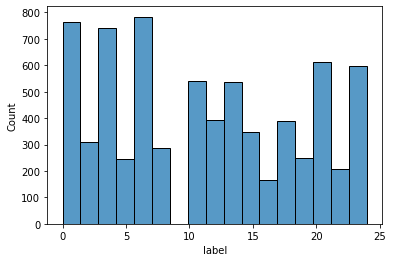

In [11]:
sns.histplot(x=Y_test, data = Y_test)

<AxesSubplot:xlabel='label', ylabel='Count'>

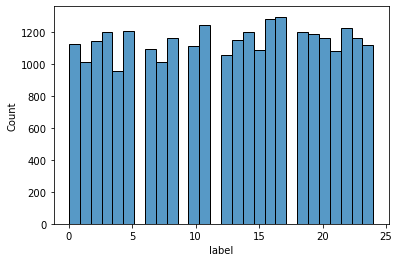

In [12]:
sns.histplot(x=Y_train, data = Y_train)

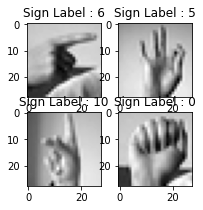

In [13]:
plt.figure(figsize = (3,3))
plt.gray()
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow(X_test[i])
  plt.title(f"Sign Label : {Y_test[i]}")


## CNN Model creation

In [14]:
model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
epochs = 6
batch_size = 128
model_history = model.fit(x = X_train, y = Y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/6
215/215 [==============================] - 54s 242ms/step - loss: 3.0967 - accuracy: 0.1075
Epoch 2/6
215/215 [==============================] - 64s 298ms/step - loss: 1.9286 - accuracy: 0.3771
Epoch 3/6
215/215 [==============================] - 65s 300ms/step - loss: 1.0826 - accuracy: 0.6189
Epoch 4/6
215/215 [==============================] - 61s 282ms/step - loss: 0.7071 - accuracy: 0.7474
Epoch 5/6
215/215 [==============================] - 60s 278ms/step - loss: 0.4851 - accuracy: 0.8278
Epoch 6/6
215/215 [==============================] - 60s 277ms/step - loss: 0.3565 - accuracy: 0.8751


In [17]:
pred = model.predict(X_test)

225/225 [==============================] - 4s 16ms/step
